## Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing

In [67]:
# loading the csv data to pandas dataframe

gold = pd.read_csv('gld_price_data.csv')

In [68]:
# print first 5 rows in the dataframe

gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [69]:
# print the last 5 rows in the datafrome

gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [70]:
# number of rows and columns

gold.shape

(2290, 6)

In [71]:
# Exploring the data

gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [72]:
# checking the missing data

gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [73]:
# getting the statisticals of the data

gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation:
   ### 1. Positive Correlation.
   ### 2. Negative Correlation.

In [74]:
correlation = gold.corr()

<AxesSubplot:>

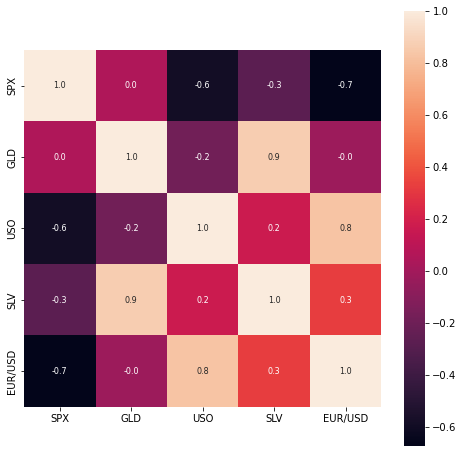

In [75]:
# creating a heatmap to undeerstand correlation

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f' , annot=True, annot_kws={'size':8})

In [76]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Omar Hussein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

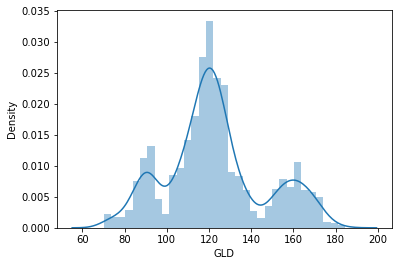

In [77]:
# checking the distrebution of the gold price

sns.distplot(gold['GLD'])

## Spliting the Features and Target

In [78]:
X = gold.drop(['Date', 'GLD'], axis=1)
Y = gold['GLD']

In [79]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [80]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Spliting into Training data and Test data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size= 0.2, random_state= 2)

## Model Training: Random forest Algorithm

In [82]:
regressor = RandomForestRegressor(n_estimators=100)

In [83]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### Model Evaluation

In [84]:
# Prediction on Test data

test_data_prediction =regressor.predict(X_test)


In [85]:
print(test_data_prediction)

[168.49989945  81.87999989 115.86270059 127.8412008  120.72720144
 154.7913977  149.99889829 125.98690021 117.48829866 126.03500075
 116.73850107 171.49450073 141.52549794 167.7574992  115.19479979
 117.74740052 139.69040251 169.96060095 159.62490344 159.09009968
 154.89810021 125.23000015 176.06849908 156.95900424 125.21000003
  93.76219964  77.6341     120.74069976 119.11529959 167.40330062
  88.06370065 125.23349992  90.95810069 117.67330049 121.17309931
 136.7170008  115.49990108 114.9784006  148.19219982 107.12740069
 104.79780257  87.32159841 126.67000055 117.90250042 153.5916985
 119.6081003  108.39689987 108.086298    93.19020048 127.34049727
  75.07130023 113.72539932 121.40420034 111.14169887 118.87199907
 120.94979892 159.97629999 166.40050152 146.95479659  85.76309847
  94.22080042  86.76929883  90.62360009 118.91310095 126.43040047
 127.53260022 169.92989955 122.39119936 117.69159886  98.38060036
 168.27870106 143.23659858 132.71160212 121.3488021  121.29559963
 119.750400

In [86]:
# R square error

eeror_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", eeror_score)

R squared error:  0.9893439659523726


### Compare Actual Values and Predicted Values in a Plot

In [87]:
Y_test = list(Y_test)

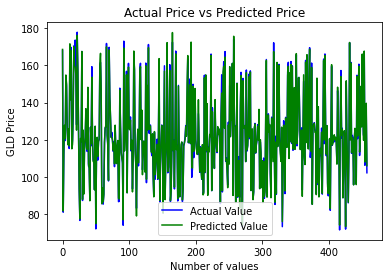

In [92]:
plt.plot(Y_test, color='blue', label= 'Actual Value')
plt.plot(test_data_prediction, color='green', label ='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()